In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [5]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

df.dropna(inplace=True)

X = df.drop(columns=['Survived'])
Y = df['Survived']



In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=10).mean()

0.627102238354507

In [23]:
def discretize(bins,strategy):
    kb_age = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    kb_fare = KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')

    clf = ColumnTransformer([
        ('age',kb_age,[0]),
        ('fare',kb_fare,[1])
    ])

    x_train_kb = clf.fit_transform(x_train)

    print(cross_val_score(DecisionTreeClassifier(),x_train_kb,y_train,cv=10).mean())

    output = pd.DataFrame({
        'age':x_train['Age'],
        'age_kb':x_train_kb[:,0],
        'fare':x_train['Fare'],
        'fare_kb':x_train_kb[:,1]
    })

    output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=clf.named_transformers_['age'].bin_edges_[0].tolist())
    output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=clf.named_transformers_['fare'].bin_edges_[0].tolist())

    print(output.sample(5))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x_train['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_train_kb[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x_train['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_train_kb[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6777979431336962
      age  age_kb     fare  fare_kb    age_labels       fare_labels
119   2.0     0.0  31.2750      7.0  (0.42, 14.0]  (29.125, 51.479]
456  65.0     9.0  26.5500      6.0  (50.0, 80.0]    (26.0, 29.125]
117  29.0     5.0  21.0000      5.0  (28.5, 32.0]     (15.75, 26.0]
237   8.0     0.0  26.2500      6.0  (0.42, 14.0]    (26.0, 29.125]
599  49.0     8.0  56.9292      8.0  (42.0, 50.0]  (51.479, 82.171]


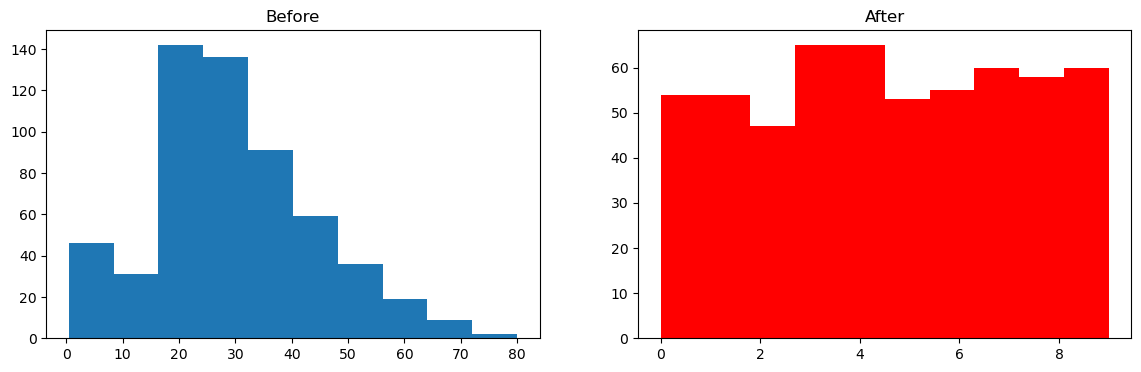

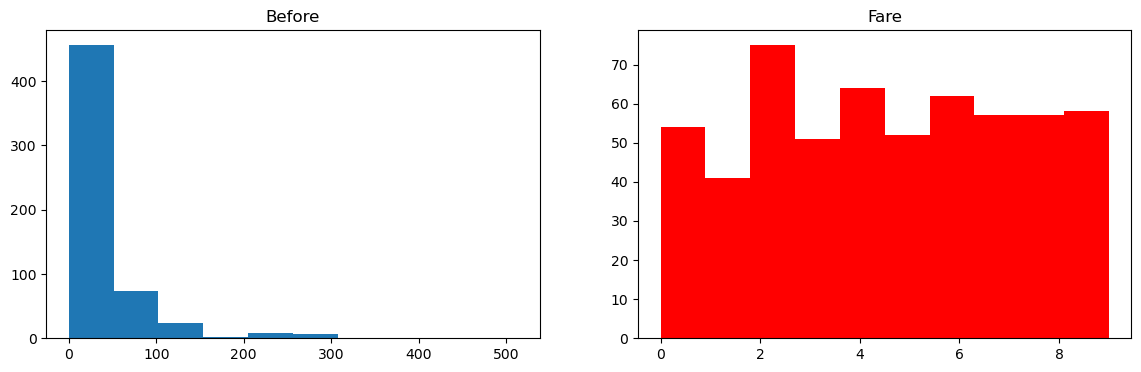

In [24]:
discretize(10,'quantile')

0.6532667876588023
      age  age_kb      fare  fare_kb        age_labels         fare_labels
689  15.0     2.0  211.3375      6.0  (11.031, 16.336]  (204.932, 239.087]
822  38.0     7.0    0.0000      0.0  (37.557, 42.863]                 NaN
762  20.0     3.0    7.2292      0.0  (16.336, 21.641]       (0.0, 34.155]
155  51.0     9.0   61.3792      1.0  (48.168, 53.473]    (34.155, 68.311]
308  30.0     5.0   24.0000      0.0  (26.947, 32.252]       (0.0, 34.155]


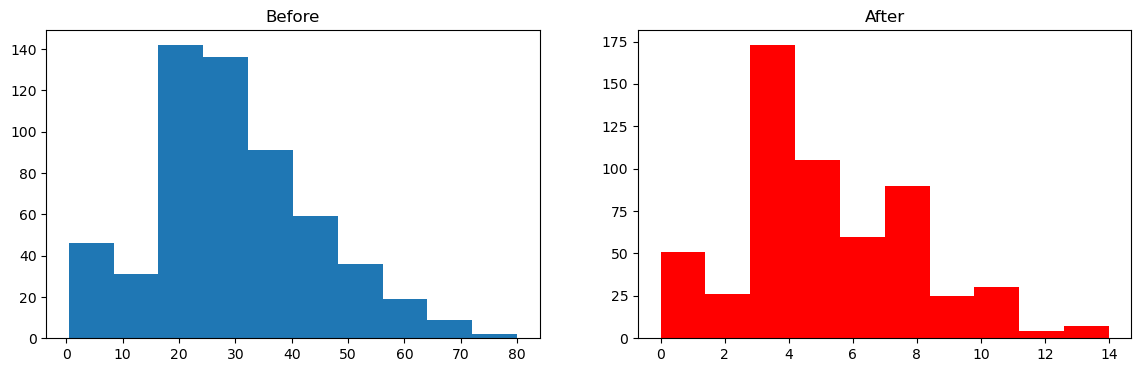

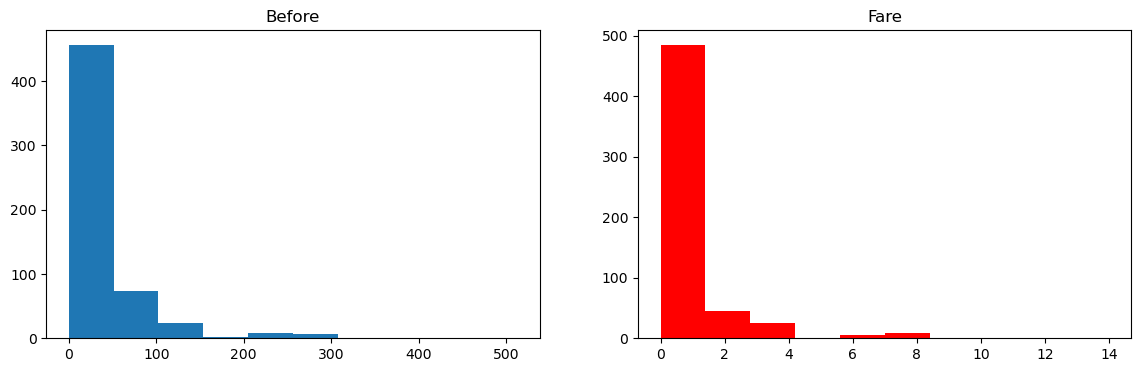

In [25]:
discretize(15,'uniform')

c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6584996975196613
      age  age_kb     fare  fare_kb        age_labels       fare_labels
655  24.0     4.0  73.5000      7.0  (21.557, 26.648]   (72.273, 84.11]
562  28.0     5.0  13.5000      1.0  (26.648, 32.145]  (11.241, 19.869]
833  23.0     4.0   7.8542      0.0  (21.557, 26.648]     (0.0, 11.241]
146  27.0     5.0   7.7958      0.0  (26.648, 32.145]     (0.0, 11.241]
183   1.0     0.0  39.0000      4.0     (0.42, 5.278]  (34.909, 45.738]


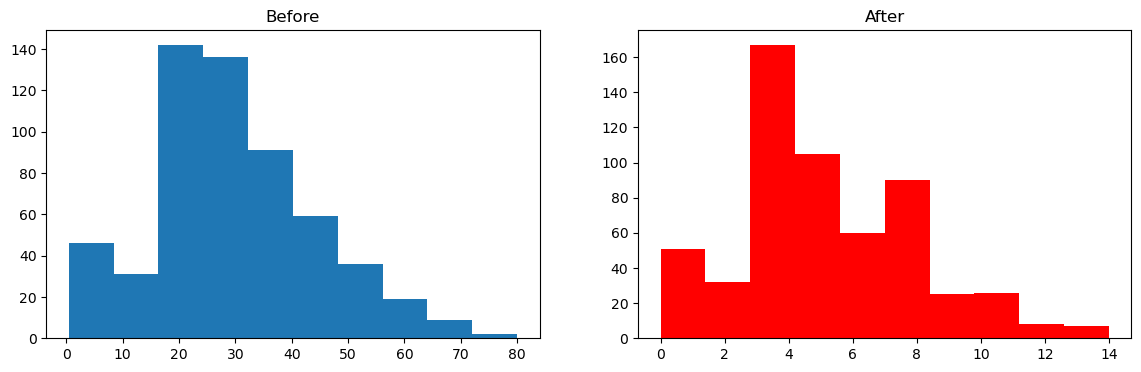

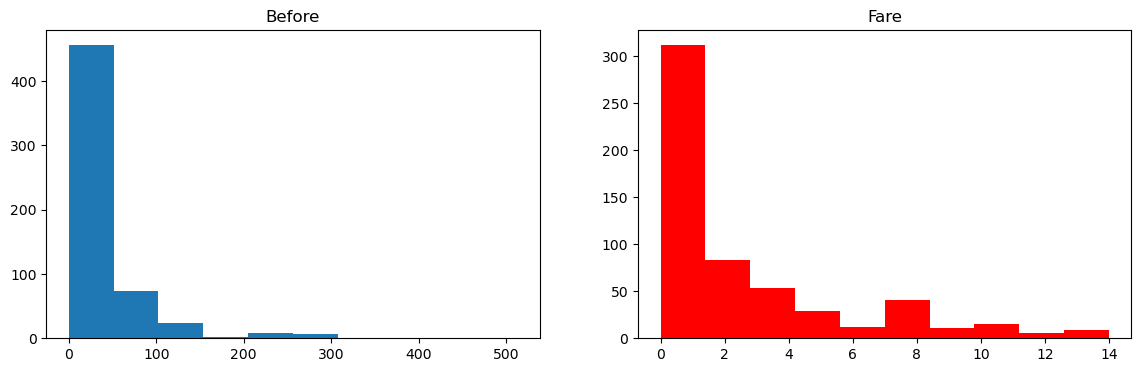

In [27]:
discretize(15,'kmeans')